# BiArchetype Analysis

In [1]:
from archetypes.datasets import make_archetypal_dataset
import numpy as np


n_archetypes = (3, 3)

rng = np.random.default_rng(5)
archetypes = rng.uniform(size=n_archetypes)

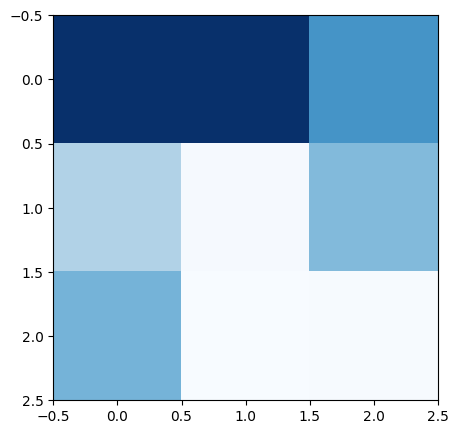

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(archetypes, cmap="Blues")
plt.show()

In [3]:
X, labels = make_archetypal_dataset(
    shape=(100, 100), alpha=0.4, archetypes=archetypes, noise=0.01, generator=123
)

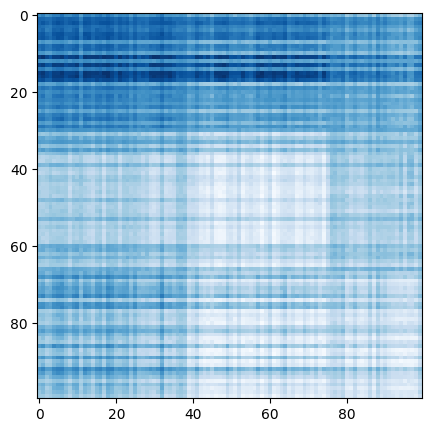

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(X, cmap="Blues")
plt.show()

In [5]:
from archetypes.jax import BiAA

method_kwargs = {"optimizer": "sgd", "optimizer_kwargs": {"learning_rate": 5e-2}}

model = BiAA(
    n_archetypes=n_archetypes,
    max_iter=1_000,
    tol=1e-3,
    method="autogd",
    method_kwargs=method_kwargs,
    init="uniform",
    seed=123,
)

model.fit(X)

BiAA(init_kwargs={}, max_iter=1000,
     method_kwargs={'optimizer': 'sgd',
                    'optimizer_kwargs': {'learning_rate': 0.05}},
     n_archetypes=(3, 3), seed=123, tol=0.001)

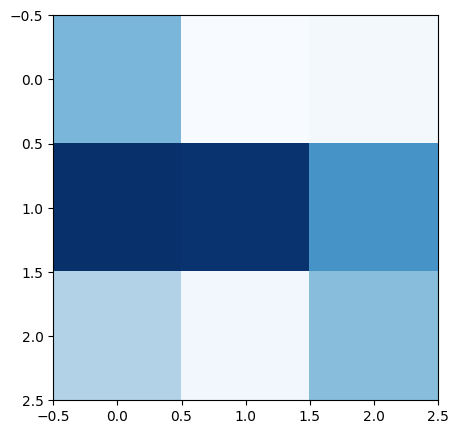

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(model.archetypes_, cmap="Blues")
plt.show()

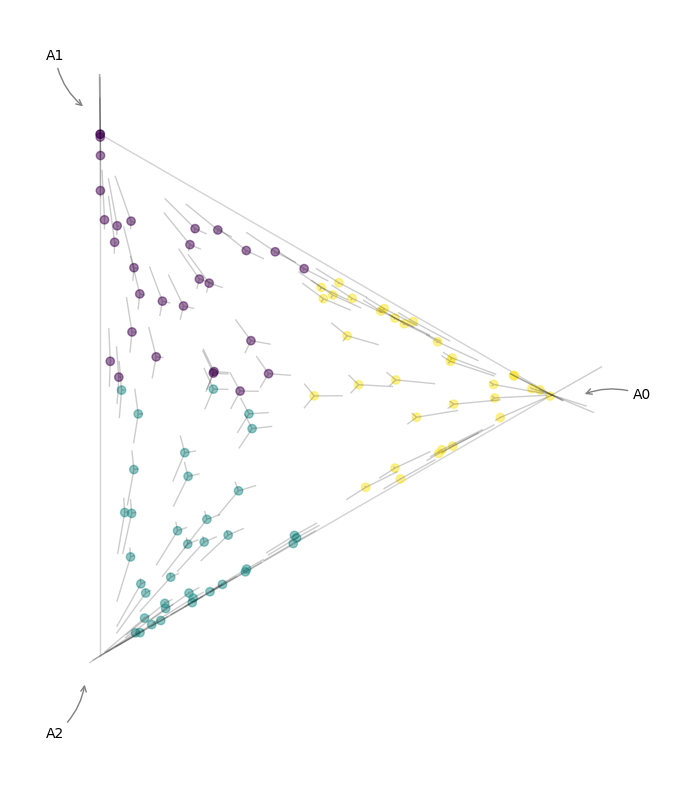

In [7]:
import matplotlib.pyplot as plt
from archetypes.visualization import simplex

plt.figure(figsize=(10, 10))
simplex(
    model.similarity_degree_[0],
    c=labels[0],
    alpha=0.5,
    show_circle=False,
    show_direction=True,
)

plt.show()

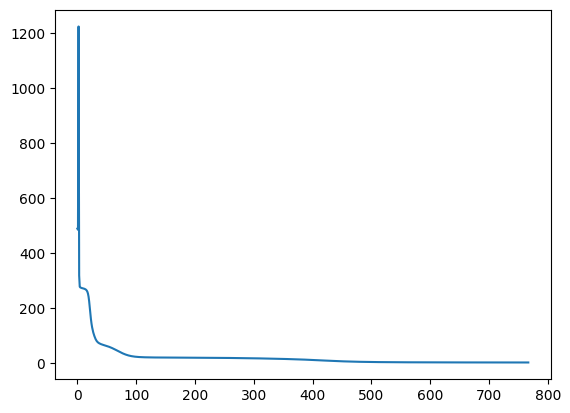

In [8]:
plt.plot(model.loss_)